# BERT: Bidirectional Encoder Representations from Transformers

## 1. Introduction
BERT (Bidirectional Encoder Representations from Transformers) is a **Transformer-based** deep learning model designed for **natural language processing (NLP)** tasks. Unlike traditional models that process text in a left-to-right or right-to-left manner, BERT is **bidirectional**, allowing it to understand the full context of a word by analyzing both its left and right surroundings.

## 2. Architecture
BERT’s model architecture consists of multiple layers of **bidirectional Transformer encoders**. The key parameters of BERT’s architecture include:

- **L**: Number of Transformer layers (i.e., blocks)
- **H**: Hidden size (dimension of the embedding layer and output vectors per token per encoder block)
- **A**: Number of self-attention heads

### Two Standard Model Sizes:
| Model       | L (Layers) | H (Hidden Size) | A (Attention Heads) | Total Parameters |
|------------|------------|---------------|-----------------|-----------------|
| **BERTBASE**  | 12         | 768           | 12              | 110M            |
| **BERTLARGE** | 24         | 1024          | 16              | 340M            |

- **Maximum input sequence length**:
  - BERTBASE: **512 tokens**
  - BERTLARGE: **1024 tokens**

## 3. Training Process
BERT undergoes **two steps** in training:

### (A) **Pre-training**
- The model is trained on large amounts of **unlabeled** data using two tasks:
  1. **Masked Language Modeling (MLM)**
  2. **Next Sentence Prediction (NSP)**

### (B) **Fine-tuning**
- The pre-trained model is further fine-tuned on **task-specific labeled datasets**, adapting BERT to tasks such as sentiment analysis, question answering, or text classification.

Each downstream task has its own fine-tuned model, though all start with the same pre-trained BERT weights.

## 4. Downstream Tasks
BERT is highly versatile and can be applied to various NLP tasks, including:

- **Sentiment Analysis**: Determines whether a text expresses positive, negative, or neutral sentiment.
- **Question Answering**: Helps chatbots and virtual assistants answer questions (e.g., SQuAD dataset).
- **Text Prediction**: Predicts words while typing (e.g., Gmail autocomplete).
- **Text Generation**: Generates coherent text from prompts.
- **Summarization**: Extracts key information from long documents.
- **Polysemy Resolution**: Disambiguates words with multiple meanings (e.g., "bank" as a financial institution vs. riverbank).

## 5. Input/Output Representations
To handle various NLP tasks, BERT represents input data in a structured format:

- Uses **WordPiece embeddings** with a **30,000-token vocabulary**.
- Each input sequence starts with a special **[CLS]** token (used for classification tasks).
- Sentence pairs are separated by a **[SEP]** token.
- A **segment embedding** differentiates sentences **A** and **B**.
- A **positional embedding** encodes token positions within the sequence.

Each input token’s representation is the **sum of**:
- Token embedding (word meaning)
- Segment embedding (sentence differentiation)
- Position embedding (token order information)


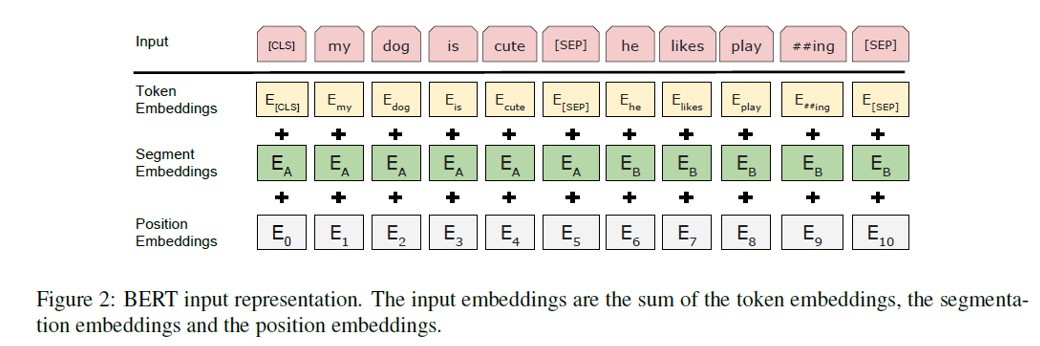

## 6. Pre-training BERT
### Task #1: **Masked Language Modeling (MLM)**
Traditional language models process text **left-to-right** or **right-to-left**, preventing true bidirectionality. BERT overcomes this by **masking 15% of tokens** in input sequences and training the model to predict them.

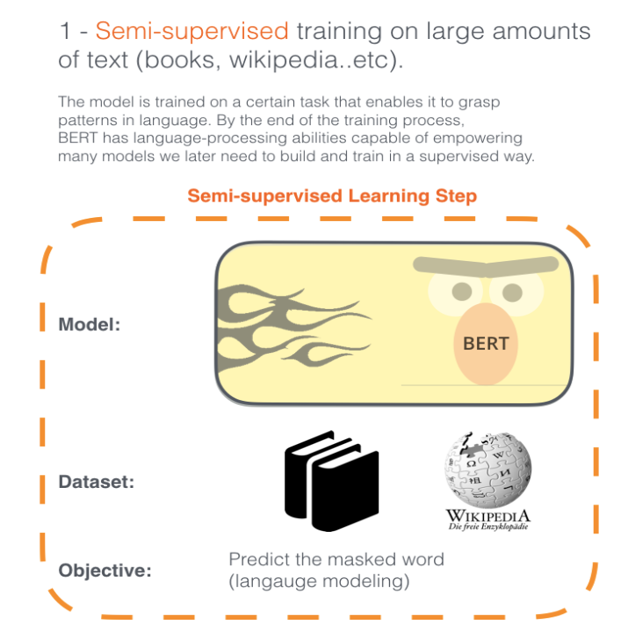

#### MLM Training Process:
1. A classification layer is added to the Transformer output.
2. The output vectors are multiplied by the embedding matrix to match vocabulary size.
3. A **softmax layer** calculates token probabilities.

**Pre-processing Strategy:**
- **80%** of masked tokens are replaced with **[MASK]**.
- **10%** are replaced with **random words**.
- **10%** remain unchanged.

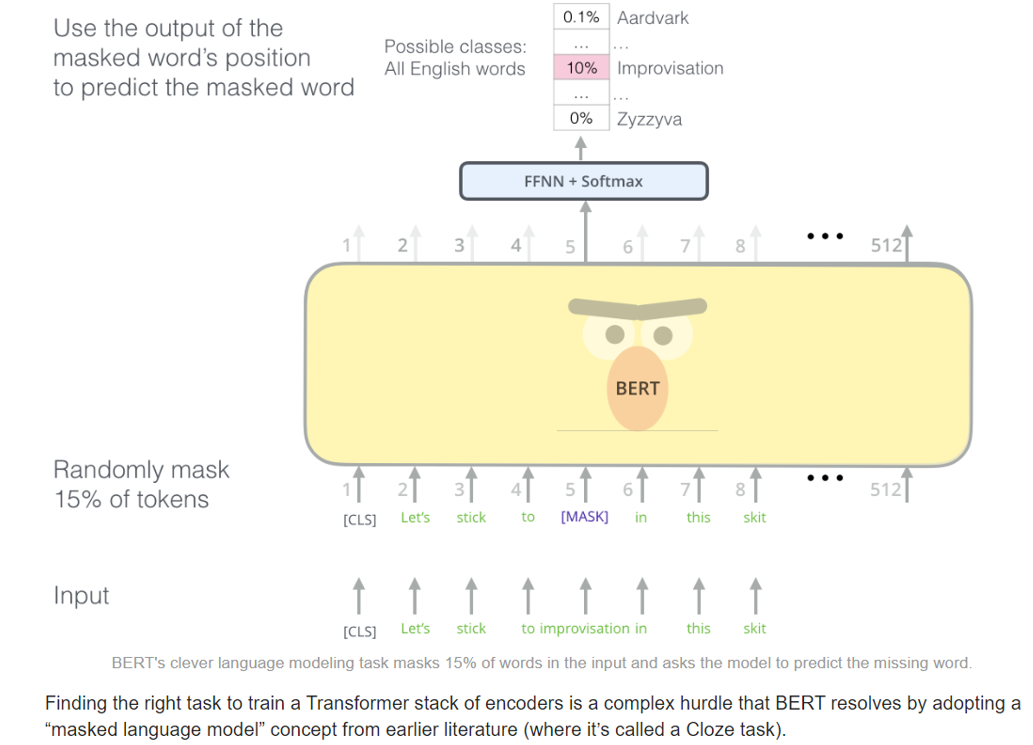

### Task #2: **Next Sentence Prediction (NSP)**
BERT learns sentence relationships by predicting whether **sentence B follows sentence A**.

**Training Process:**
- **50%** of input pairs contain the actual next sentence.
- **50%** contain a random sentence from the dataset.

**Input Processing:**
- **[CLS]** is added before sentence A, and **[SEP]** separates sentences.
- **Segment embeddings** differentiate sentence A from sentence B.
- **Positional embeddings** encode word order.

**Prediction:**
- The **[CLS]** token’s output vector passes through a classification layer.
- A **softmax** function predicts if B follows A.
- MLM and NSP are trained **simultaneously** to minimize a **combined loss function**.

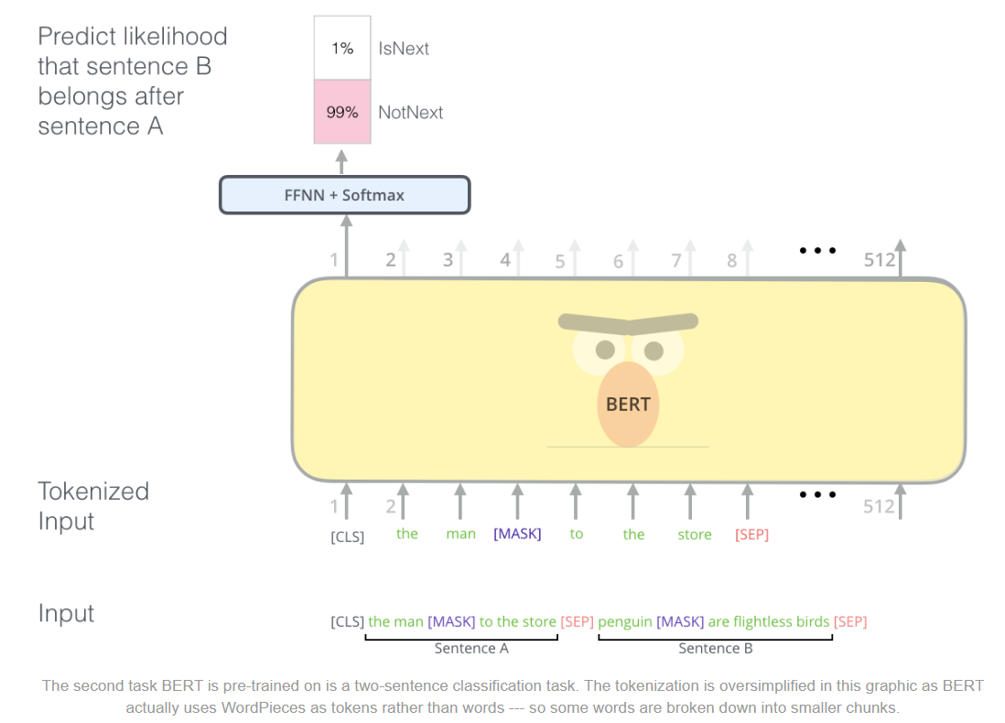

## 7. How to Use BERT (Fine-Tuning)
BERT can be fine-tuned for different tasks by adding **task-specific layers**:

- **Sentiment Analysis**: Add a classification layer to the **[CLS]** token output.
- **Question Answering (SQuAD)**: Learn two vectors marking the **start and end** of an answer in a text. Using BERT, a Q&A model can be trained by learning two extra vectors that mark the beginning and the end of the answer.
- **Named Entity Recognition (NER)**: Classify each token to identify entities (e.g., names, organizations, dates). Using BERT, a NER model can be trained by feeding the output vector of each token into a classification layer that predicts the NER label.

### Recommended Hyperparameters for Fine-Tuning:
| Hyperparameter     | Recommended Values |
|--------------------|-------------------|
| **Batch size**    | 16, 32            |
| **Learning rate** (Adam) | 5e-5, 3e-5, 2e-5 |
| **Epochs**        | 2, 3, 4           |

BERT’s fine-tuning process has been optimized to achieve **state-of-the-art** results across multiple NLP benchmarks.

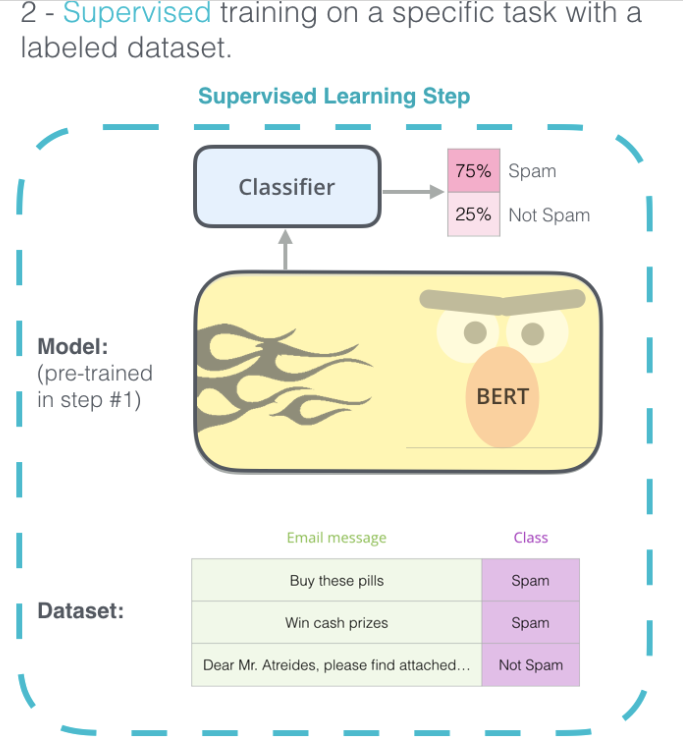

## 8. Conclusion
BERT’s bidirectional Transformer architecture enables **deep contextual understanding**, making it one of the most powerful NLP models. By pre-training on **masked language modeling** and **next sentence prediction**, then fine-tuning on downstream tasks, BERT achieves remarkable performance on a wide range of language applications.

